In [42]:
import sys
sys.path.append("../src")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

%matplotlib inline

In [5]:
df_x_train = pd.read_csv("../data/X_train.csv", index_col="id")
df_y_train = pd.read_csv("../data/y_train.csv", index_col="id")

In [6]:
print(f"#Features: {df_x_train.shape[1]}\n#observations: {df_x_train.shape[0]}")

#Features: 832
#observations: 1212


# 1) Response y

In [7]:
# Distribution of y
df_y_train['y'].describe()

count    1212.000000
mean       69.889439
std         9.720843
min        42.000000
25%        64.000000
50%        70.000000
75%        77.000000
max        97.000000
Name: y, dtype: float64

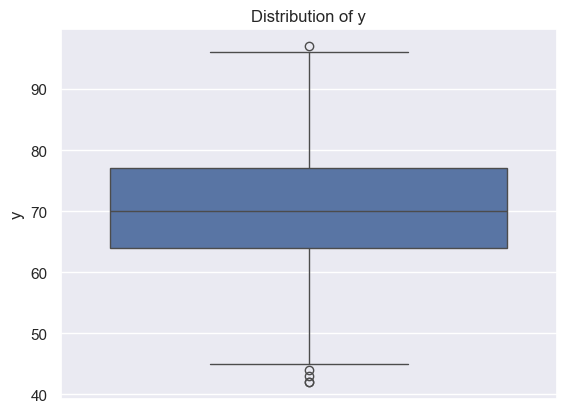

In [8]:
sns.boxplot(df_y_train['y']).set_title('Distribution of y');

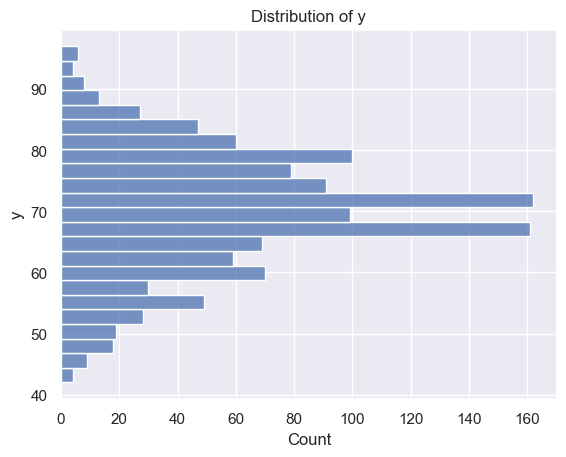

In [10]:
sns.histplot(data=df_y_train, y='y').set_title('Distribution of y');

# 2) Features X

In [14]:
# Samples with largest number of missing values
df_x_train.isnull().sum(axis=1).sort_values(ascending=False).head(15)

id
867.0    89
430.0    87
900.0    86
980.0    86
794.0    86
565.0    85
495.0    84
898.0    83
809.0    82
463.0    82
509.0    81
965.0    81
126.0    81
785.0    81
513.0    81
dtype: int64

In [33]:
df_x_train.transpose().apply(lambda x: x.describe(), axis=1)['50%'].head(15)

x0     1.504847e+04
x1     1.083948e+04
x2     3.401540e+03
x3     1.000538e+05
x4     1.050299e+02
x5     9.967064e+01
x6     9.991007e+03
x7     1.049886e+04
x8     1.049423e+04
x9     9.970521e+00
x10    9.995667e+04
x11    1.004716e+06
x12    1.055261e+01
x13    1.004180e+03
x14    1.054329e+01
Name: 50%, dtype: float64

In [25]:
scaler = RobustScaler().fit(df_x_train)
df_x_train_scaled = pd.DataFrame(scaler.transform(df_x_train))

In [34]:
df_feature_stats = df_x_train_scaled.transpose().apply(lambda x: x.describe(), axis=1).sort_values(by='std')

Text(0.5, 1.0, 'Distribution of feature variation')

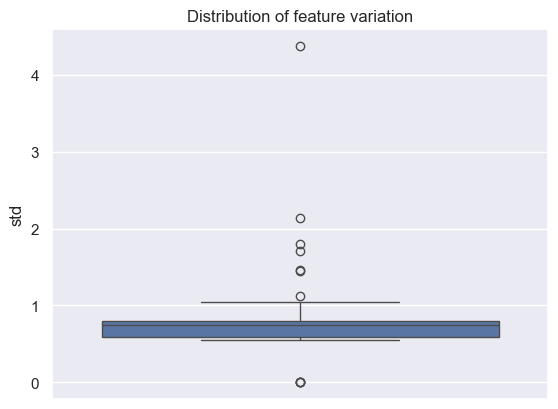

In [38]:
sns.boxplot(df_feature_stats['std']).set_title('Distribution of feature variation');

In [39]:
# Summary stat of feature variation
df_feature_stats['std'].describe()

count    832.000000
mean       0.719695
std        0.190535
min        0.000000
25%        0.594525
50%        0.747962
75%        0.793841
max        4.375176
Name: std, dtype: float64

In [46]:
# Preprocess features
preprocessing = Pipeline([
('scaler', RobustScaler())
, ('imputer', KNNImputer())
])

preprocessing.fit(df_x_train)
df_x_train_prep = preprocessing.transform(df_x_train)

In [56]:
correlations = pd.Series(np.corrcoef(df_x_train_prep, rowvar=False).flatten()).sort_values()
correlations = correlations[correlations != 1]

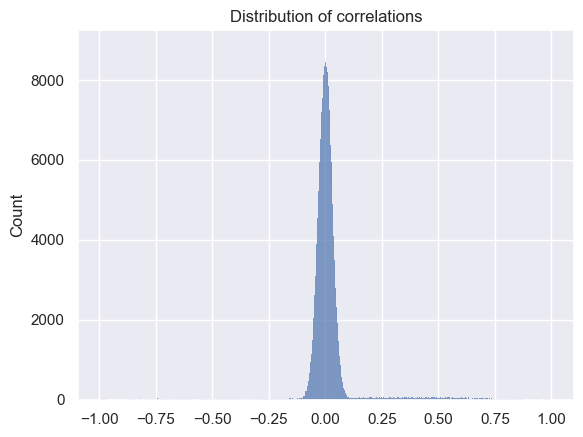

In [61]:
sns.histplot(correlations).set_title('Distribution of correlations');

In [62]:
correlations.describe()

count    684981.000000
mean          0.014889
std           0.131387
min          -0.995343
25%          -0.020696
50%           0.001557
75%           0.024539
max           1.000000
dtype: float64